In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [3]:
def sample_vector(theta):
    theta_dim = theta.shape[0]
    theta_idx = int(np.random.uniform(0,theta_dim))
    return theta[theta_idx]

In [4]:
def equality(a,b):
    c = (a == b)
    boolean = True
    for i in range(c.shape[0]):
        boolean *= c[i]
    return boolean

In [5]:
def less_than(a,b):
    c = (a < b)
    boolean = True
    for i in range(c.shape[0]):
        boolean *= c[i]
    return boolean

In [6]:
def greater_than(a,b):
    c = (a > b)
    boolean = True
    for i in range(c.shape[0]):
        boolean *= c[i]
    return boolean

In [7]:
def transition_model(curr_theta,theta):
    d = curr_theta.shape[0]
    gamma = 2.38/np.sqrt(2*d)
    
    theta_a = theta[0]
    
    while(equality(theta_a, curr_theta)):
        theta_a = sample_vector(theta)
    theta_b = sample_vector(theta)
    while(equality(theta_b, curr_theta) or equality(theta_a, theta_b)):
        theta_b = sample_vector(theta)
    
    var = 0.1
    eps = np.zeros(d)
    
    eps = np.random.normal(0,var,size=(d))
    
    new_theta = curr_theta + gamma*(theta_a-theta_b) + eps

    return new_theta

In [8]:
def prior(theta):
    if(np.any(theta) <= 0):
        return 0
    return 1

In [9]:
def posterior_fn(theta, theta_0, freq, freq_exp, beta, alpha, Z):
    N_m = freq.shape[0]
    Q = theta.shape[0]
    tmp1 = 0
    for i in range(N_m):
        tmp1 += ((freq_exp[i] - freq[i])/freq_exp[i])**2
    tmp2 = 0
    norm = np.linalg.norm(theta-theta_0,2)
    for i in range(Q):
        tmp2 += alpha[i]/2 * norm**2
    posterior = 1/Z * np.exp(-beta/2*tmp1-tmp2)
    
    return posterior

In [ ]:
def acceptance_rule(z, z_new):
    if z_new>z:
        return True
    else:
        u = np.random.uniform(0,1)
        return (u < z_new/z)

In [10]:
N = 10
theta_init = np.array([])
d = theta_init.shape[0]
theta_pop = np.zeros((N,d))
theta_max = np.array([4600,2600,2670,3400,2750])
theta_min = np.array([3200,1800,1600,1800,2050])
theta_pop[0, :] = theta_init
for i in range(1,N):
    theta_pop[i] = np.random.uniform(theta_min, theta_max)


In [11]:
def DE_metropolis_hastings(lkh_fnc, prior, transition_model, theta_pop, traj_len, data, acceptance_rule):
    
    curr_theta = theta_0
    samples = []
    n_acc = 0
    n_rej = 0
    for i in range(traj_len):
        new_theta = transition_model(curr_theta, theta_pop)
        curr_lkh = lkh_fnc(curr_theta,data)
        new_lkh = lkh_fnc(new_theta,data)
        
        if(acceptance_rule(curr_lkh + np.log(prior(curr_theta)), new_lkh + np.log(prior(new_theta)))):
            curr_theta = new_theta
            samples.append(new_theta)
            n_acc += 1
        else:
            samples.append(curr_theta)
            n_rej += 1
    print("chain generated", n_rej)
    return samples, n_rej, curr_theta

In [13]:
N_s = 10000
all_chains = np.zeros((N, N_s, d))
for i in range(N):
    n_accept = 0
    n_rej = 0
    samples = []
    curr_theta = theta_pop[i]
    curr_lkh = 
    for j in range(N_s):
        new_theta = transition_model(curr_theta,theta_pop)
        posterior_new = posterior_fn(new_theta, theta_0, freq, freq_exp, beta, alpha,Z)
        if(acceptance_rule(posterior_curr, posterior_new)):
            curr_theta = new_theta
            posterior_curr = posterior_new
            samples.append(new_theta)
            n_accept += 1
        else:
            samples.append(curr_theta)
            n_rej += 1
    
    print("Chain generated")
    print(n_rej)
    all_chains[i] = np.array(samples)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Chain generated
9994
Chain generated
9994
Chain generated
9995
Chain generated
9994
Chain generated
9994
Chain generated
9994
Chain generated
9994
Chain generated
9994
Chain generated
9994
Chain generated
9993


In [14]:
new_theta = transition_model(theta_pop[0], theta_pop)
print(new_theta)
print(theta_min)
print(theta_max)

[4264.64620505 2550.37006144 1400.1167698  2982.65554037 2144.15264017]
[3200 1800 1600 1800 2050]
[4600 2600 2670 3400 2750]


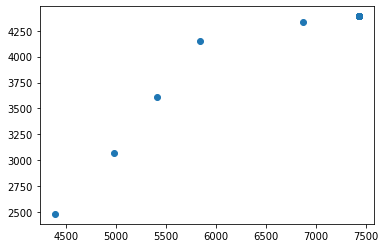

In [15]:
plt.plot(all_chains[5,:,0],all_chains[5,:,1],'o')